Based on the Polya urn model, this program will create histograms of observed ratios of black balls in the urn after 
1000 draws(steps) for 10000 trials with different initial conditions (a, b), compared to the density function of 
the Beta(a,b) distribution. (a: the initial number of black balls in the urn; b: the initial number of red balls)

First, download required packages and declare variables to store data from the simulations

In [ ]:
library(ggplot2)
nsteps <- 1000 # number of steps to sample in one trial
trials <- 10000 # number of trials(more trials make the graph clearer)
ratio <- matrix(0, nsteps,1) #create a matrix to record the ratio of black balls in the urn over time

Based on the Polya urn model, write a R function to generate simulations with given initial numbers of black/red balls
and output the histograms to visualize how the ratio converges to the corresponding Beta distribution with same parameters

In [2]:
# Parameters of the function
# a: initial number of black balls
# b: initial number of red balls
polya_urn.fun <- function(a, b) {
  for (i in 1:trials){
    black_curr <- a #current number of black balls
    red_curr <- b #current number of red balls
    for (n in 1:nsteps){
      # the prob of drawing a black ball is (current # of black balls)/(initial # of black+red balls + current # of steps)
      # the prob of drawing a red ball is (current # of red balls)/(initial # of black+red balls + current # of steps)
      # Given those probabilities, sample a ball from the urn, 
      # here we use 1 to represent a balck ball and 0 to represent a red ball
      drawn<-sample(c(1,0), size=1, prob=c(black_curr, red_curr)/(a + b + n))
      if (drawn == 1) {
        black_curr <- black_curr + 1
      } else {
        red_curr <- red_curr + 1
      }
    }
    # in the ith trial, add the ratio of black balls in the urn after n steps
    ratio[i]<-black_curr/(a +b + n)
  }
  # the proportion of black balls in the urn converges in distribution 
  # to the Beta distribution with parameters the same as initial # of red balls
  # and initial # of black balls when n grows.
  # As shown by the graph
  sort_ratio <- sort(ratio)
  beta_pdf <- dbeta(sort_ratio, a, b)
  df <- data.frame(ratio,beta_pdf)
  beta_para <- paste("BETA(",a,",",b,")")
  num_bins <- 20
  urn_plot <- ggplot(df, aes(ratio)) +                  
       geom_histogram(aes(x = ratio), fill="lightblue", bins = num_bins, boundary=0, color = "white") + 
       scale_x_continuous(breaks = seq(0, 1, by=0.2), limits=c(0,1)) +
       labs(title = beta_para,
         x = "Ratio of Black Balls in the Urn",
         y = "") + 
       theme_bw(base_size = 16) +
       theme(plot.title = element_text(hjust = 0.5, face = "bold"), 
             axis.text.y = element_blank(), 
             plot.margin = unit(c(1, 1, 1, 2), "cm")) + 
       geom_line(aes(x = sort_ratio, y= (trials/num_bins) * beta_pdf), colour="red")
  return(urn_plot)
}

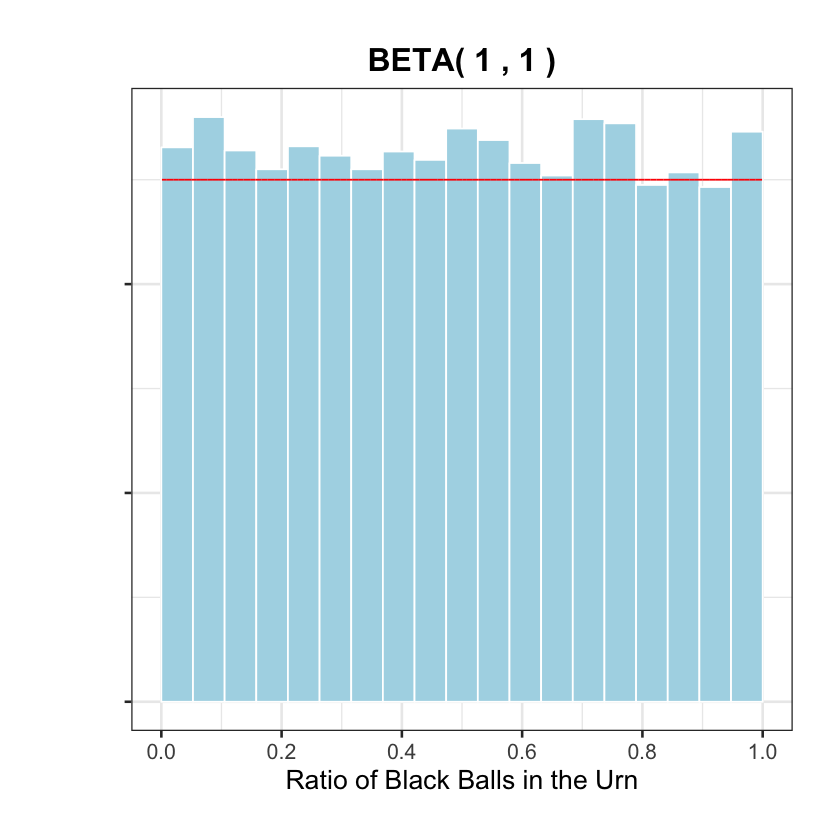

In [3]:
# Simulate the Polya's urn with _ black ball and _ red ball at the beginning(you can fill the parameters 
# with different sets of numbers) Since the the number of iterations is huge, the function takes a while to give the output.
polya_urn.fun(1,1)